### Things you can do to a DataFrame Index
- `set_index()` / `reset_index()`.
    - Moves a single column into / from the index.
- `.stack()`.
    - This converts a wide ("normal") table into long format.
    - long format = many many rows with a hierarchical index, with 1 column.
    - wide format = fewer rows, many columns, flat hierarchy
- `unstack()`
    - Converts from long to wide.
- `.groupby()`
    - Grouping by more than 1 column converts your table into long format.
    - this lends itself nicely for subsequent unstacking

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/PaulWlodkowski/Downloads/gapminder_total_fertility.csv')

In [8]:
data = {'name':['Alice', 'Bob', 'Charlie'],
        'age': [12, 34, 56],
        'weight': [44, 66, 88]}
wide = pd.DataFrame(data)

In [26]:
long = pd.DataFrame(wide.stack())

---

### Let's see a practical application
- Grouping by multiple columns, and then unstacking, so that it can be plotted more nicely.

In [33]:
pk = pd.read_csv('/Users/PaulWlodkowski/Downloads/pokemon.csv')

For each Pokemon Type (e.g. Grass, Fire, Ice), is there a clear increase in average attack if it is Legendary?

In [53]:
pk2 = pk.groupby(['Type 1', 'Legendary'])[['Attack']].mean().unstack(1)

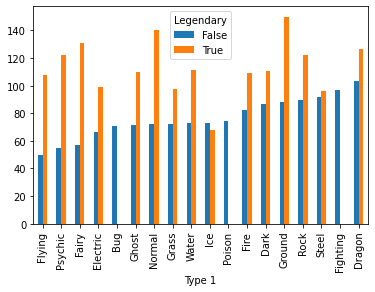

In [65]:
pk2['Attack'].sort_values(by=False).plot.bar()

What is the most common pair of Pokemon Types (Type 1 and Type 2). (e.g. Grass-Poison, Rock-Ice)
- `df.groupby(['col1', 'col2', ....])['other column'].operation()`

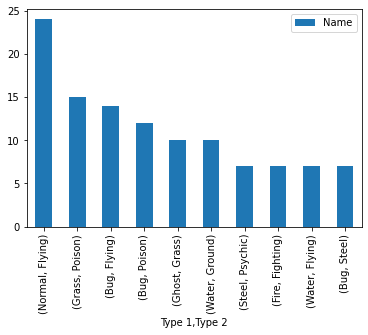

In [82]:
pk.groupby(['Type 1', 'Type 2'])[['Name']].count().sort_values(by='Name', ascending=False).head(10).plot.bar()

In [86]:
import seaborn as sns

matrix = pk.groupby(['Type 1', 'Type 2'])[['Name']].count().sort_values(by='Name', ascending=False).unstack(1)

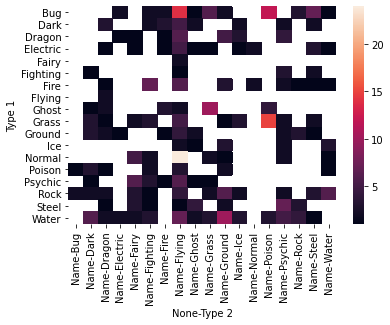

In [88]:
sns.heatmap(matrix)